# Quantum Exponentiation: g<sup>x</sup> mod N where N = 15



In [1]:
import pandas as pd
from math import gcd
from qiskit import *
from qiskit.visualization import plot_histogram

## Variables

In [2]:
g = 13
x = 3
N = 15
x_bin = "{0:b}".format(x)
n_qubits = len(x_bin)

if gcd(g, N) != 1:
    raise ValueError("g must be relatively first with N (15)!")

## Introductory information

In [6]:
power = list(range(0, N + 1))
modulo = [g**x % 15 for x in power]

comparison_df = pd.DataFrame()
comparison_df['power'] = power
comparison_df['modulo'] = modulo

display(comparison_df)

print('Number raised to power: {number}'.format(number = g))
print('Power of number: {power}'.format(power = x))
print('Modulo: 15')

expected_result = comparison_df.loc[comparison_df['power'] == x]['modulo'].values[0]
print('Expected result: {result}'.format(result = expected_result))

,power,modulo
0,0,1
1,1,13
2,2,4
3,3,7
4,4,1
5,5,13
6,6,4
7,7,7
8,8,1
9,9,13


Number raised to power: 13
Power of number: 3
Modulo: 15
Expected result: 7


## Unitary operator U

In [7]:
def U(g, power):

    U = QuantumCircuit(4)

    for _ in range(power):

        if g in [2, 13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)

        if g in [7, 8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)

        if g in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)

        if g in [7, 11, 13]:

            for q in range(4):
                U.x(q)

    U = U.to_gate()
    U.name = "%i^%i mod 15" % (g, power)

    return U.control()

## Circuit

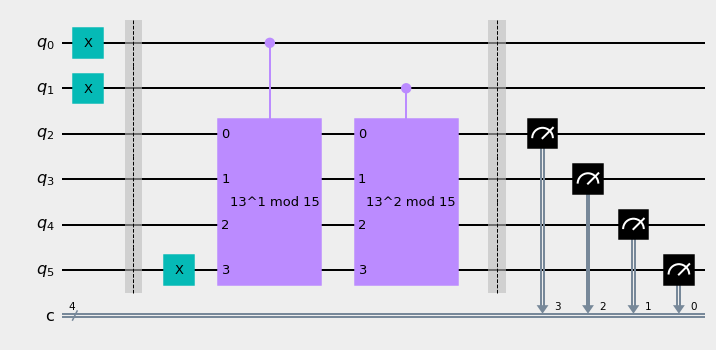

Circuit output: 0111


In [8]:
# create circuit
circ = QuantumCircuit(n_qubits + 4, 4)

# prepare x input
i = 0

for b in x_bin[::-1]:

    if b == '1':
        circ.x(i)
        
    i += 1

circ.barrier()

# And auxiliary register in state |1>
circ.x(3 + n_qubits)

# Do controlled-U operations
for q in range(n_qubits):
    circ.append(U(g, 2**q), [q] + [i + n_qubits for i in range(4)])

circ.barrier()

# measures
for i in range(4):
    circ.measure(n_qubits + i, 3 - i)

# display circuit
display(circ.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}))

# collect result
aer_sim = Aer.get_backend('aer_simulator')
t_circ = transpile(circ, aer_sim)
job = execute(circ, aer_sim, shots=1, memory=True)
output = job.result().get_memory()[0]

print('Circuit output: {result}'.format(result = output))
circuit_result = int(output, 2)


## Summary

In [9]:
print('Expected result: {result}'.format(result = expected_result))
print('Circuit result: {result}'.format(result = circuit_result))

Expected result: 7
Circuit result: 7
